# comcast ticketing 

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [72]:
# import the libraries
import numpy as np
import pandas as pd

In [73]:
# load the data
data = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [74]:
# print first five rows
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [75]:
# check the data types
data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [76]:
data['Date'] = pd.to_datetime(data['Date']) # convert date to datetime
data['Date']

0      2015-04-22
1      2015-04-08
2      2015-04-18
3      2015-05-07
4      2015-05-26
          ...    
2219   2015-04-02
2220   2015-06-02
2221   2015-06-09
2222   2015-06-23
2223   2015-06-24
Name: Date, Length: 2224, dtype: datetime64[ns]

In [77]:
#fetch month from date column
data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [78]:
# extract count groupby month
data1 = data[['Ticket #', 'month']].copy()
data2 = data1.groupby("month")
count4 = data2.get_group(4)['Ticket #'].count()
count5 = data2.get_group(5)['Ticket #'].count()
count6 = data2.get_group(6)['Ticket #'].count()

df = pd.DataFrame({'month':[4,5,6],'Count':[count4,count5,count6]})
df

,month,Count
0,4,545
1,5,399
2,6,1280


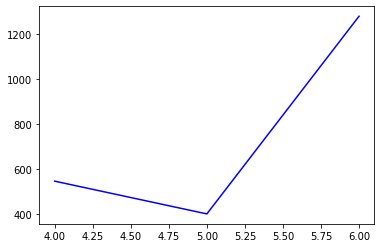

In [79]:
# plot trendchart
import matplotlib.pyplot as plt

plt.plot(df['month'],df['Count'],color='blue')
plt.show()

In [80]:
# extract count group by date
data_days = data.groupby('Date')
days = list(data_days.groups)
count1 = data_days['Date'].count()
count1 = count1.tolist()
df1 = pd.DataFrame({'Days':days,'Count':count1})
df1

,Days,Count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


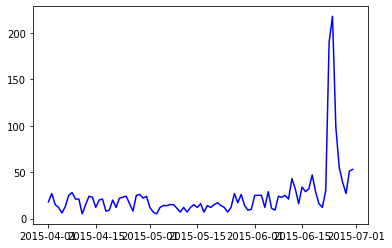

In [12]:
plt.plot(df1['Days'],df1['Count'],color='blue')
plt.show()

Provide a table with the frequency of complaint types.
Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [81]:
data['Customer Complaint'] = data['Customer Complaint'].str.lower()
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,service availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,4
2220,318775,comcast monthly billing for returned modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,6
2222,360489,extremely unsatisfied comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6


In [88]:
def get_type (row):
   if ("internet" in row['Customer Complaint']):
      return 'Internet Issues'
   elif ("network" in row['Customer Complaint']) or ("speed" in row['Customer Complaint']):
      return "network/speed issues"
   else:
      return "other"

data['Complaint_Type'] = data.apply (lambda row: get_type(row), axis=1)
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint_Type
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet Issues
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,other
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,network/speed issues
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,other
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,other


In [91]:
data3 = data[['Ticket #', 'Complaint_Type']].copy()
data4 = data3.groupby("Complaint_Type")
count1 = data4.get_group("Internet Issues")['Ticket #'].count()
count2 = data4.get_group("network/speed issues")['Ticket #'].count()
count3 = data4.get_group("other")['Ticket #'].count()

df2 = pd.DataFrame({'Issue':["Internet Issues","network/speed issues","other"],'Count':[count1,count2,count3]})
df2

,Issue,Count
0,Internet Issues,532
1,network/speed issues,87
2,other,1605


Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [95]:
data['Status'] = data['Status'].str.lower()
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint_Type
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,closed,No,4,Internet Issues
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,closed,No,4,other
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,closed,Yes,4,network/speed issues
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,open,Yes,5,other
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,solved,No,5,other


In [97]:
def new_status(row):
   if ("open" in row['Status']) or ("pending" in row['Status']):
      return 'open'
   elif ("closed" in row['Status']) or ("solved" in row['Status']):
      return "Closed"
   else:
      return "other"

data['new status'] = data.apply (lambda row: new_status(row), axis=1)
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint_Type,new status
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,closed,No,4,Internet Issues,Closed
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,closed,No,4,other,Closed
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,closed,Yes,4,network/speed issues,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,open,Yes,5,other,open
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,solved,No,5,other,Closed


Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

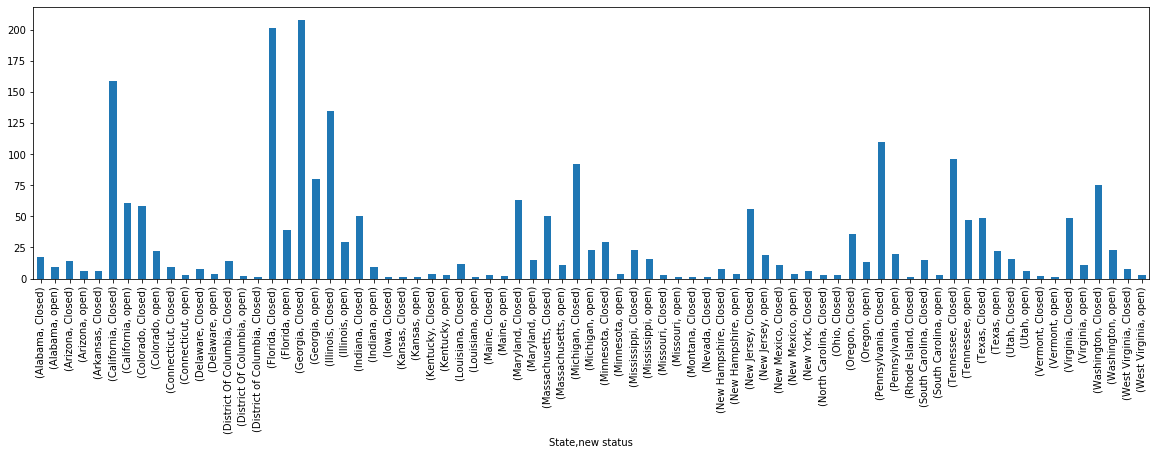

In [105]:
data5 = data[['State', 'new status']].copy()
data6 = data5.groupby(['State','new status']).size()
plt.figure(figsize=(20,5))
data6.plot.bar()

In [108]:
data5['Ticket #'] = data['Ticket #'].copy()
data5

,State,new status,Ticket #
0,Maryland,Closed,250635
1,Georgia,Closed,223441
2,Georgia,Closed,242732
3,Georgia,open,277946
4,Georgia,Closed,307175
...,...,...,...
2219,Florida,Closed,213550
2220,Michigan,Closed,318775
2221,Michigan,Closed,331188
2222,Michigan,Closed,360489


In [116]:
data7 = data5.groupby(['State','new status'])['Ticket #'].count().reset_index()

In [117]:
data7

,State,new status,Ticket #
0,Alabama,Closed,17
1,Alabama,open,9
2,Arizona,Closed,14
3,Arizona,open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,open,11
73,Washington,Closed,75
74,Washington,open,23
75,West Virginia,Closed,8


In [118]:
data7.dtypes

State         object
new status    object
Ticket #       int64
dtype: object

In [121]:
# which state has max complaints
data8 = data5.groupby(['State'])['Ticket #'].count().reset_index()
data8

,State,Ticket #
0,Alabama,26
1,Arizona,20
2,Arkansas,6
3,California,220
4,Colorado,80
5,Connecticut,12
6,Delaware,12
7,District Of Columbia,16
8,District of Columbia,1
9,Florida,240


In [132]:
# get state with max tickets. 
sorted_data = data8.sort_values(by='Ticket #',ascending= False)
sorted_data.iloc[0,:]

State       Georgia
Ticket #        288
Name: 10, dtype: object

In [152]:
# fetch open tickets for each state
lst = ['open']
data9 = data7[data7['new status'].isin(lst)]    
data9.columns = ['State', 'new status', 'open tickets'] 
data9

,State,new status,open tickets
1,Alabama,open,9
3,Arizona,open,6
6,California,open,61
8,Colorado,open,22
10,Connecticut,open,3
12,Delaware,open,4
14,District Of Columbia,open,2
17,Florida,open,39
19,Georgia,open,80
21,Illinois,open,29


In [158]:
# merge open tickets and total tickets
data10 = pd.merge(data8, data9, on="State",how="left")
data10 = data10.drop('new status',axis=1)
data10.fillna(0,inplace=True)
data10

,State,Ticket #,open tickets
0,Alabama,26,9.0
1,Arizona,20,6.0
2,Arkansas,6,0.0
3,California,220,61.0
4,Colorado,80,22.0
5,Connecticut,12,3.0
6,Delaware,12,4.0
7,District Of Columbia,16,2.0
8,District of Columbia,1,0.0
9,Florida,240,39.0


In [159]:
# calculate percentage and sort based on percentage
data10['percentage'] = (data10['open tickets']/data10['Ticket #'])*100
data10

,State,Ticket #,open tickets,percentage
0,Alabama,26,9.0,34.615385
1,Arizona,20,6.0,30.000000
2,Arkansas,6,0.0,0.000000
3,California,220,61.0,27.727273
4,Colorado,80,22.0,27.500000
5,Connecticut,12,3.0,25.000000
6,Delaware,12,4.0,33.333333
7,District Of Columbia,16,2.0,12.500000
8,District of Columbia,1,0.0,0.000000
9,Florida,240,39.0,16.250000


In [160]:
sorted_data1 = data10.sort_values(by='percentage',ascending= False)
sorted_data1.iloc[0,:]

State           Kansas
Ticket #             2
open tickets         1
percentage          50
Name: 14, dtype: object

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [169]:
# get the count of tickets received via internet and customer calls
lst1 = ['Internet','Customer Care Call']
data11 = data[data['Received Via'].isin(lst1)]  
data12 = data11.groupby("Received Via")
count1 = data12.get_group("Internet")['Ticket #'].count()
count2 = data12.get_group("Customer Care Call")['Ticket #'].count()

df3 = pd.DataFrame({'Received Via':["Internet","Customer Care Call"],'Count':[count1,count2]})
df3

,Received Via,Count
0,Internet,1105
1,Customer Care Call,1119


In [175]:
# group by status and received Via and fetch closed tickets total
lst2 = ['Closed']
data13 = data[data['new status'].isin(lst2)]
data14 = data13.groupby("Received Via")
count1 = data14.get_group("Internet")['Ticket #'].count()
count2 = data14.get_group("Customer Care Call")['Ticket #'].count()

df4 = pd.DataFrame({'Received Via':["Internet","Customer Care Call"],'Count':[count1,count2]})
df4.columns = ['Received Via','Closed count']
df4

,Received Via,Closed count
0,Internet,843
1,Customer Care Call,864


In [178]:
# merge both dfs and calculate percentage
df5 = pd.merge(df4,df3,on="Received Via")
df5
df5['percentage'] = (df5['Closed count']/df5['Count'])*100
df5

,Received Via,Closed count,Count,percentage
0,Internet,843,1105,76.289593
1,Customer Care Call,864,1119,77.211796
